# Super Wiwino project

In [2]:
import sqlite3

conn = sqlite3.connect("db/vivino.db")
cur = conn.cursor()
import pandas as pd

### All the flavors of this particular wine

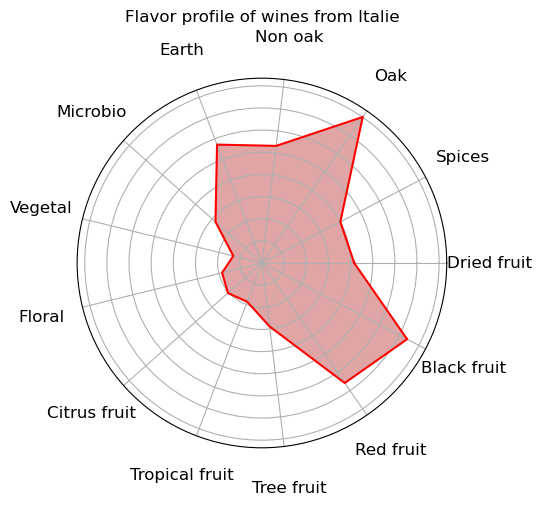

In [3]:
import matplotlib.pyplot as plt
import numpy as np



country = 'Italie'



query_wine = f"""
            SELECT DISTINCT keywords_wine.group_name, AVG(keywords_wine.count) as count
            FROM wines
            INNER JOIN keywords_wine
            ON wines.id = keywords_wine.wine_id
            INNER JOIN regions
            ON wines.region_id = regions.id
            INNER JOIN countries
            ON regions.country_code = countries.code
            WHERE countries.name == '{country}'
            GROUP BY 1
            ORDER BY 2 DESC
            """

wine = pd.read_sql_query(query_wine, conn)

flavors = [ "dried_fruit" , "spices", "oak", "non_oak", "earth", "microbio", "vegetal", "floral", "citrus_fruit", "tropical_fruit", "tree_fruit", "red_fruit", "black_fruit"]
wine.group_name = wine.group_name.astype("category")
wine.group_name = wine.group_name.cat.set_categories(flavors)
wine = wine.sort_values(["group_name"])  ## 'sort' changed to 'sort_values'



fig = plt.figure()
ax1 = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(wine) + 1) / float(len(wine)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = wine['count'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax1.plot(theta, values, color="red", marker=",", label="count")
theta_ticks = wine.group_name.str.capitalize().replace('_', ' ', regex=True)
plt.xticks(theta[:-1], theta_ticks, color='black', size=12)
ax1.tick_params(pad=20) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax1.fill(theta, values, 'firebrick', alpha=0.4)
ax1.set_yticklabels([])

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title(f"Flavor profile of wines from {country}")
plt.show()

### Spider plot for the top 10 best rated wines

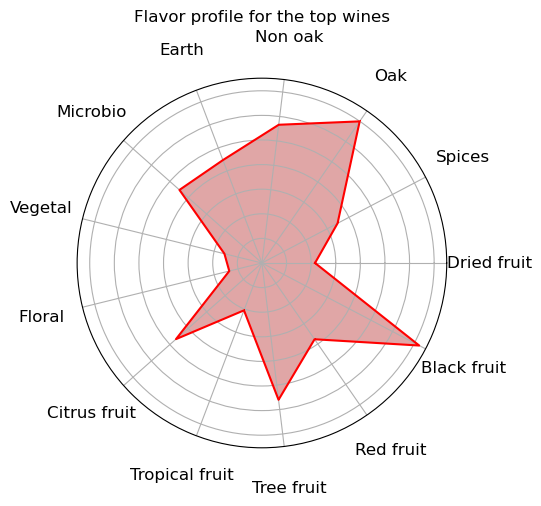

In [4]:
query_nbwines = """
                SELECT COUNT(*)
                FROM wines
                """
nb_wines = pd.read_sql_query(query_nbwines, conn)
nb_wines = nb_wines.values[0][0]

query_wine = f"""
            SELECT keywords_wine.group_name , AVG (keywords_wine.count) as count
            FROM wines
            JOIN keywords_wine
            ON wines.id = keywords_wine.wine_id
            WHERE wines.id IN (
                        SELECT id 
                        FROM wines
                        ORDER BY wines.ratings_average DESC
                        LIMIT {round(nb_wines/10)}
                        )
            GROUP BY keywords_wine.group_name
            """

wine = pd.read_sql_query(query_wine, conn)

wine.group_name = wine.group_name.astype("category")
wine.group_name = wine.group_name.cat.set_categories(flavors)
wine = wine.sort_values(["group_name"])  ## 'sort' changed to 'sort_values'
wine



fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(wine) + 1) / float(len(wine)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values = wine['count'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="red", marker=",", label="count")
theta_ticks = wine.group_name.str.capitalize().replace('_', ' ', regex=True)
plt.xticks(theta[:-1], theta_ticks, color='black', size=12)
ax.tick_params(pad=20) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'firebrick', alpha=0.4)
ax.set_yticklabels([])

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title(f"Flavor profile for the top wines")
plt.show()

### Which wines to highlight ?

1 - The fizziest !

In [5]:
query_fizz = """
            SELECT wines.name, 
            vintages.year,
            wines.fizziness, 
            vintages.price_euros
            
                FROM wines
                
            INNER JOIN vintages
                ON wines.id = vintages.wine_id
                
            GROUP BY wines.id
            
            ORDER BY fizziness DESC
            
            LIMIT 1
            """
fizziest = pd.read_sql_query(query_fizz, conn)
fizziest

,name,year,fizziness,price_euros
0,Les Riceys Cuvée Cyriès Brut Millesimé Champagne,2018,5.0,50.0


2 - The sweetest !

In [6]:
query_sweet = """
            SELECT wines.name, 
            vintages.year,
            wines.sweetness, 
            vintages.price_euros
            
                FROM wines
                
            INNER JOIN vintages
                ON wines.id = vintages.wine_id
                
            GROUP BY wines.id
            
            ORDER BY sweetness DESC
            
            LIMIT 1
            """
sweetest = pd.read_sql_query(query_fizz, conn)
sweetest

,name,year,fizziness,price_euros
0,Les Riceys Cuvée Cyriès Brut Millesimé Champagne,2018,5.0,50.0


3 - The most intense !

In [7]:
query_intense = """
            SELECT wines.name, 
            vintages.year,
            wines.intensity, 
            vintages.price_euros
            
                FROM wines
                
            INNER JOIN vintages
                ON wines.id = vintages.wine_id
                
            GROUP BY wines.id
            
            ORDER BY intensity DESC
            
            LIMIT 1
            """
intensest = pd.read_sql_query(query_intense, conn)
intensest

,name,year,intensity,price_euros
0,Red Blend,2016,5.0,99.98


4 - The most complex

In [8]:
query_complex = """
                SELECT wines.name,
                    vintages.year,
                    SUM(keywords_wine.count) AS complexity,
                    vintages.price_euros
                    
                    FROM wines
                    
                INNER JOIN vintages
                    ON wines.id = vintages.wine_id
                    
                INNER JOIN keywords_wine
                    ON wines.id = keywords_wine.wine_id
                    
                GROUP BY wines.id
                
                ORDER BY complexity DESC
                
                LIMIT 1
                """
complexest = pd.read_sql_query(query_complex, conn)
complexest

,name,year,complexity,price_euros
0,Tignanello,1978,613120,376.25


5 - The yeastiest ! For the funky wine lovers

In [9]:
query_yeasty = """
                SELECT wines.name,
                    vintages.year,
                    SUM(keywords_wine.count) AS yeastiness,
                    vintages.price_euros
                    
                    FROM wines
                    
                INNER JOIN vintages
                    ON wines.id = vintages.wine_id
                    
                INNER JOIN keywords_wine
                    ON wines.id = keywords_wine.wine_id
                    
                INNER JOIN keywords
                    ON keywords_wine.keyword_id = keywords.id
                    
                WHERE keywords.name = "yeast"
                    
                GROUP BY wines.id
                
                ORDER BY yeastiness DESC
                
                LIMIT 1
                """
yeastiest = pd.read_sql_query(query_yeasty, conn)
yeastiest

,name,year,yeastiness,price_euros
0,Brut Champagne,2000,3755,638.83


6 - The most tropical ! Summer is almost almost almost there !

In [10]:
query_tropical = """
                SELECT wines.name,
                    vintages.year,
                    SUM(keywords_wine.count) AS tropicalness,
                    vintages.price_euros
                    
                    FROM wines
                    
                INNER JOIN vintages
                    ON wines.id = vintages.wine_id
                    
                INNER JOIN keywords_wine
                    ON wines.id = keywords_wine.wine_id
                    
                WHERE keywords_wine.group_name = "tropical_fruit"
                    
                GROUP BY wines.id
                
                ORDER BY tropicalness DESC
                
                LIMIT 1
                """
tropicalest = pd.read_sql_query(query_tropical, conn)
tropicalest

,name,year,tropicalness,price_euros
0,Sauternes,1962,9270,1025.0


7 - The fruitest !

In [11]:
query_fruity = """
                SELECT wines.name,
                    vintages.year,
                    SUM(keywords_wine.count) AS fruitiness,
                    vintages.price_euros
                    
                    FROM wines
                    
                INNER JOIN vintages
                    ON wines.id = vintages.wine_id
                    
                INNER JOIN keywords_wine
                    ON wines.id = keywords_wine.wine_id
                    
                WHERE keywords_wine.group_name IN ("tropical_fruit", "citrus_fruit","tree_fruit", "black_fruit", "red_fruit", "dried_fruit")
                    
                GROUP BY wines.id
                
                ORDER BY fruitiness DESC
                
                LIMIT 1
                """
fruitiest = pd.read_sql_query(query_fruity, conn)
fruitiest

,name,year,fruitiness,price_euros
0,Sassicaia,1970,168950,1270.0


The best rated !

In [18]:
query_best = """
            SELECT wines.name, 
            vintages.year,
            wines.ratings_average AS rating, 
            vintages.price_euros
            
                FROM wines
                
            INNER JOIN vintages
                ON wines.id = vintages.wine_id
                
            GROUP BY wines.id
            
            ORDER by rating DESC
            
            LIMIT 1
            """
best = pd.read_sql_query(query_best, conn)
best

,name,year,rating,price_euros
0,Batard-Montrachet Grand Cru,2020,4.8,1149.5


The best value/price !

In [63]:
query_vp = """
            SELECT wines.name,
            vintages.year, 
            wines.ratings_average, 
            AVG(vintages.price_euros) as price, 
            wines.ratings_average/vintages.price_euros as value_price
                FROM wines
            INNER JOIN vintages
                ON wines.id = vintages.wine_id
            ORDER BY value_price DESC
            LIMIT 1
            """
best_vp = pd.read_sql_query(query_vp, conn)
best_vp

,name,year,ratings_average,price,value_price
0,Siepi,2005,4.4,619.774011,0.026074


### Countries ordered by how much wine they drink over how much wine they produce

In [26]:
query_most_wines = """
                    SELECT name, SUM(users_count)/SUM(wines_count) as thirstiness
                        FROM countries
                    GROUP BY name
                    ORDER BY 2 DESC
                    """

top_countries_wines = pd.read_sql_query(query_most_wines, conn)
top_countries_wines

,name,thirstiness
0,États-Unis,60
1,Suisse,47
2,Roumanie,33
3,Portugal,28
4,Israël,27
5,Espagne,22
6,Argentine,17
7,Italie,15
8,Allemagne,15
9,France,14


### Countries ordered by how many wineries they have

In [125]:
query_most_wineries = """
                    SELECT name, SUM(wines_count), SUM(wineries_count)
                    FROM countries
                    GROUP BY name
                    ORDER BY 3 DESC
                    """

top_countries_wineries = pd.read_sql_query(query_most_wineries, conn)
top_countries_wineries 


,name,SUM(wines_count),SUM(wineries_count)
0,France,422503,67553
1,Italie,274658,42399
2,États-Unis,204060,28145
3,Espagne,102662,18026
4,Australie,90954,13946
5,Allemagne,164533,13643
6,Portugal,39847,5834
7,Chili,41191,5785
8,Argentine,36121,5339
9,Afrique du Sud,30857,4227


In [132]:
query_regions = """
                SELECT DISTINCT countries.name, AVG(wines.ratings_average)
                FROM regions
                INNER JOIN wines
                ON regions.id = wines.region_id
                INNER JOIN countries
                ON regions.country_code = countries.code
                GROUP BY countries.name
                ORDER BY 2 DESC
                """

regions = pd.read_sql_query(query_regions, conn)
regions

,name,AVG(wines.ratings_average)
0,Allemagne,4.500000
1,Israël,4.500000
2,États-Unis,4.490541
3,Moldavie,4.480000
4,Hongrie,4.472727
5,Afrique du Sud,4.459091
6,Australie,4.458333
7,France,4.447130
8,Espagne,4.443617
9,Portugal,4.435714
